Dataset1:  Insurance Dataset (Simple Linear Regression)


Load Data and Write script to perform following operations

1st Task: Consider the above data and perform preprocessing. 

In this task,we will first add all necessary libraries,after that we will do all the preprocessing work for cleaning our data...including encoding process...to convert categorical data to numerical data...and using head for displaying first five entries from the data.

This code scales the 'age', 'bmi', and 'children' features in your DataFrame using the StandardScaler, which centers the features around 0 and scales them to unit variance. This is a common and often necessary preprocessing step for many machine learning tasks.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Encoding categorical variables
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Checking for missing values (should be 0 in this case)
print(data.isnull().sum())

# Scaling the numerical features (age, bmi, children)
scaler = StandardScaler()
scaled_features = ['age', 'bmi', 'children']
data[scaled_features] = scaler.fit_transform(data[scaled_features])

# Display the preprocessed data
print(data.head())




age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
        age  sex       bmi  children  smoker  region      charges
0 -1.438764    0 -0.453320 -0.908614       1       3  16884.92400
1 -1.509965    1  0.509621 -0.078767       0       2   1725.55230
2 -0.797954    1  0.383307  1.580926       0       2   4449.46200
3 -0.441948    1 -1.305531 -0.908614       0       1  21984.47061
4 -0.513149    1 -0.292556 -0.908614       0       1   3866.85520


2nd task-- Perform basic EDA for data analysis.

In this task, we will do the proper EDA which means Exploratory Data Analysis...from which we will find the insights of our data and also we will get to know the correlations of two different features with each other using the correlation heatmap.

By setting kde=True in sns.histplot, you're instructing Seaborn to add the KDE curve to your histogram. This curve provides a visual representation of the underlying distribution of the 'charges' data.

                age          sex           bmi      children       smoker  \
count  1.338000e+03  1338.000000  1.338000e+03  1.338000e+03  1338.000000   
mean  -1.805565e-16     0.505232 -2.124194e-16 -5.576008e-17     0.204783   
std    1.000374e+00     0.500160  1.000374e+00  1.000374e+00     0.403694   
min   -1.509965e+00     0.000000 -2.412011e+00 -9.086137e-01     0.000000   
25%   -8.691547e-01     0.000000 -7.164063e-01 -9.086137e-01     0.000000   
50%   -1.474046e-02     1.000000 -4.320880e-02 -7.876719e-02     0.000000   
75%    8.396738e-01     1.000000  6.611572e-01  7.510793e-01     0.000000   
max    1.765289e+00     1.000000  3.685522e+00  3.240619e+00     1.000000   

            region       charges  
count  1338.000000   1338.000000  
mean      1.515695  13270.422265  
std       1.104885  12110.011237  
min       0.000000   1121.873900  
25%       1.000000   4740.287150  
50%       2.000000   9382.033000  
75%       2.000000  16639.912515  
max       3.000000  63770.

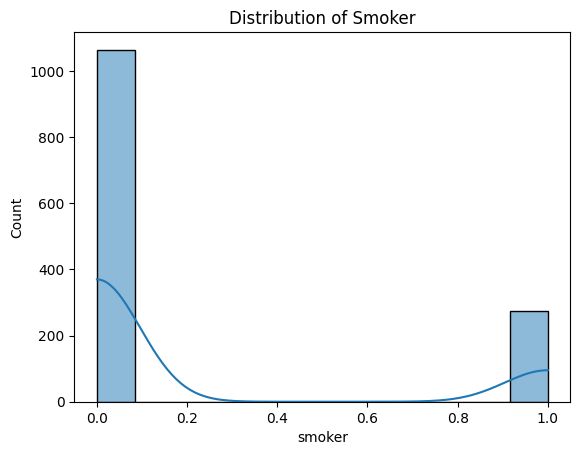

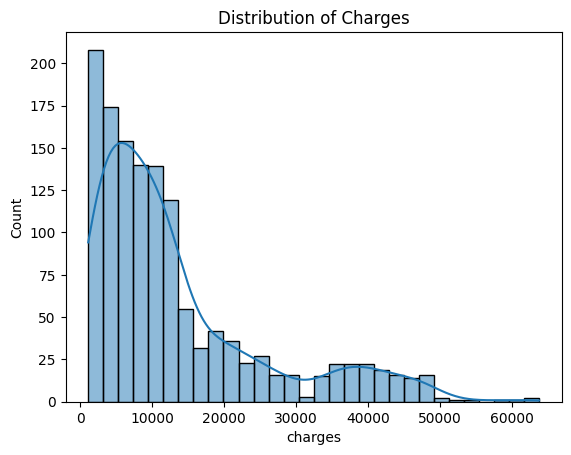

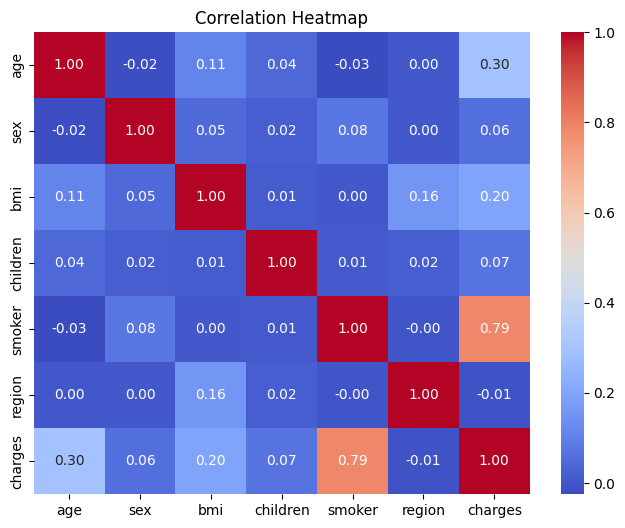

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Displaying descriptive statistics
print(data.describe())

# Visualizing the distribution of smoker and charges
sns.histplot(data['smoker'], kde=True)
plt.title('Distribution of Smoker')
plt.show()

sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

# Creating a heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



using pairplot for getting all the graphs of smoker

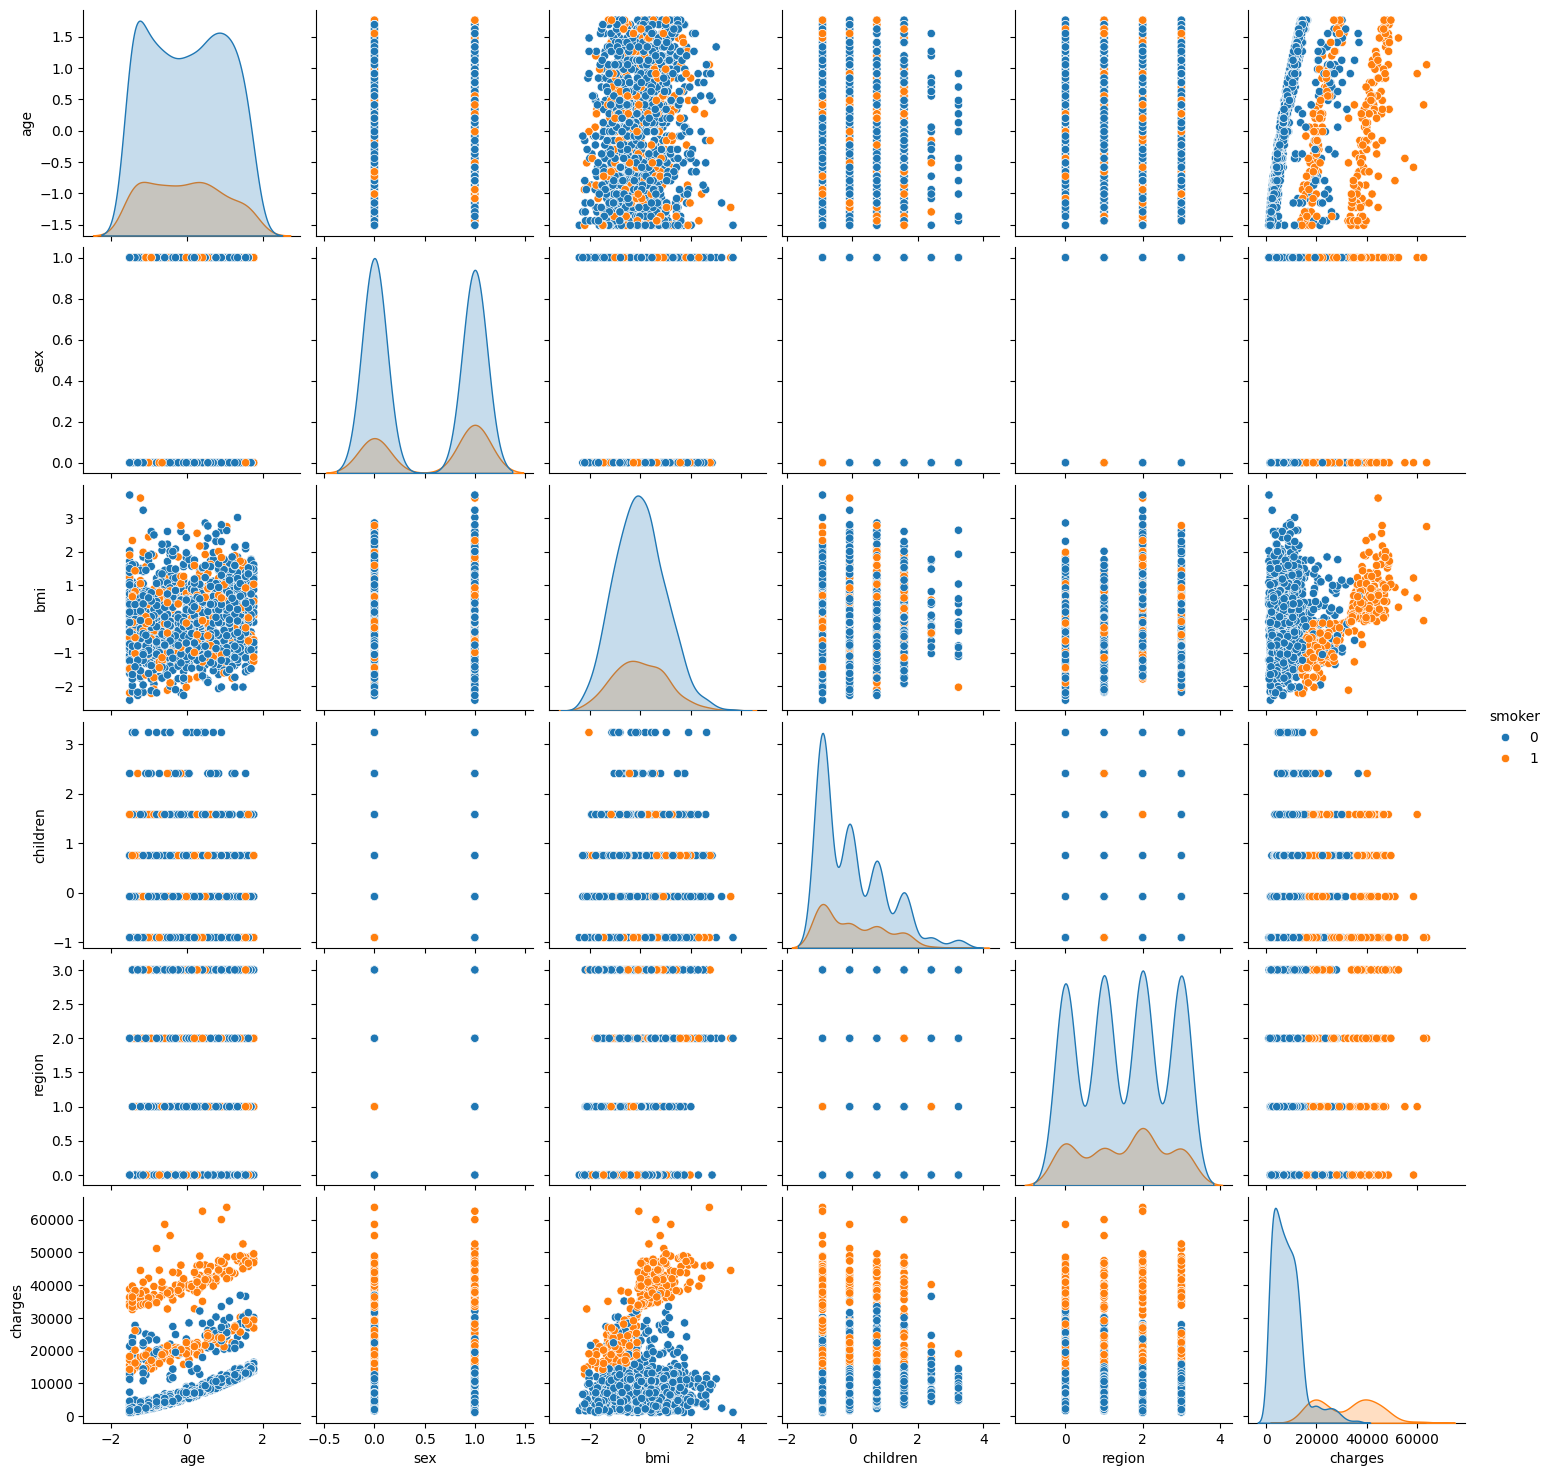

In [3]:
sns.pairplot(data, hue='smoker', diag_kind='kde')
plt.show()

Task 3-- Perform feature engineering to select appropriate features.

Using above heatmap we get to know that the we can choose charges as the target variable and we can choose smoker as the feature variable as its correlation is greater than all other features.

In [4]:
# Select a single feature (smoker) for Simple Linear Regression
X = data[['smoker']]  # Independent variable (single feature: 'smoker')

# Select the target variable (charges)
y = data['charges']  # Dependent variable (target: 'charges')


from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1070, 1)
Test set size: (268, 1)


Task 4: Construct linear regression model

Using Simple linear regression because we have selected only one single feature as input and one target variable.

In [5]:
from sklearn.linear_model import LinearRegression

# Create the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)



LinearRegression()

In [6]:
# Display model coefficients and intercept
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [23188.68587068]
Model Intercept: 8578.32254799999


The value 23188.68587068 means that for every one-unit increase in the feature 'x', the model predicts a 23188.68587068-unit increase in the target variable 'y'. In other words, there's a positive relationship between 'x' and 'y'.

 The intercept represents the predicted value of 'y' when 'x' is zero. In this case, when 'x' is zero, the model predicts 'y' to be 8578.32254799999.

This model suggests a linear relationship between 'x' and 'y'. For every unit increase in 'x', 'y' is predicted to increase by approximately 23188.69 units. When 'x' is zero, 'y' is predicted to be approximately 8578.32 units.

Task 5: Evaluate the Model with Appropriate Metrics

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

#Calculate rmse
rmse = np.sqrt(mse)

#Calculate mae
mae = mean_absolute_error(y_test, y_pred)


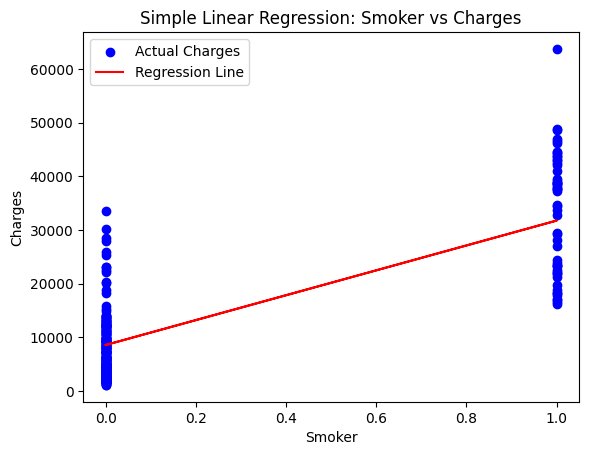

In [8]:
import matplotlib.pyplot as plt

# Visualize the actual vs predicted charges (scatter plot)
plt.scatter(X_test, y_test, color='blue', label='Actual Charges')  # Actual values
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted values

# Customize the plot
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Simple Linear Regression: Smoker vs Charges')
plt.legend()

# Display the plot
plt.show()


The graph visually suggests a positive relationship between smoking and charges.

Task 6: Generate the Results

In [9]:
# Display the results in a clean format
print("\n### Model Evaluation Results ###")
print("\nLinear Regression Model:")
print(f"- Mean Squared Error (MSE): {mse:.2f}")
print(f"- R-squared (R²): {r2:.2f}")
print(f"- Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"- Mean Absolute Error (MAE): {mae:.2f}")



### Model Evaluation Results ###

Linear Regression Model:
- Mean Squared Error (MSE): 52745964.73
- R-squared (R²): 0.66
- Root Mean Squared Error (RMSE): 7262.64
- Mean Absolute Error (MAE): 5625.81


 The MSE is 52,745,964.73. Because the errors are squared, the MSE is in the units of the target variable squared. This makes it a bit difficult to interpret directly in the context of your data (unless you're comfortable thinking in "charges squared").

An R² of 0.66 means that your model explains 66% of the variance in medical charges. The remaining 34% of the variance is unexplained by the model and is likely due to other factors not included in the model.

 An RMSE of 7,262.64 means that, on average, the model's predictions are about $7,262.64 away from the actual medical charges.

As of Mean Absolute Error (MAE) is 5625.81 which is lower, so we can say that the Lower MAE means better predictions.